In [1]:
import glob    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
import seaborn as sns
sns.set_theme()
sns.set(font_scale=0.8)

from solardatatools import DataHandler
from solardatatools.solar_noon import energy_com
from solardatatools.signal_decompositions import l2_l1d1_l2d2p365 as cvx_sd # sum_squares version
from solardatatools.signal_decompositions_l2norm import l2_l1d1_l2d2p365 as cvx_sd_l2norm
from solardatatools.algorithms.time_shifts import TimeShift

In [3]:
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [4]:
%load_ext autoreload
%autoreload 2

In [6]:
# plot_heatmap(matrix='raw', flag='clear')
# plot_heatmap(matrix='filled', flag='bad')

# Check current time shift analysis in DataHandler 
## (4 out of 7 datasets)

./cassandra/timeshifts/TABF01017766.csv
total time: 54.38 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              22.76s
Cleaning                   8.26s
Filtering/Summarizing      23.36s
    Data quality           0.74s
    Clear day detect       1.03s
    Clipping detect        0.11s
    Capacity change detect 21.47s



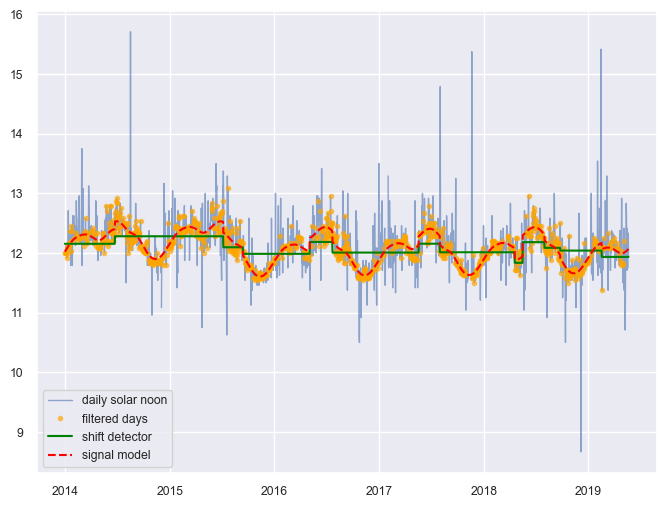

Timeshift:  True
./cassandra/timeshifts/TACLC1036521.csv
total time: 37.94 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              16.48s
Cleaning                   7.10s
Filtering/Summarizing      14.37s
    Data quality           0.52s
    Clear day detect       1.20s
    Clipping detect        0.13s
    Capacity change detect 12.52s



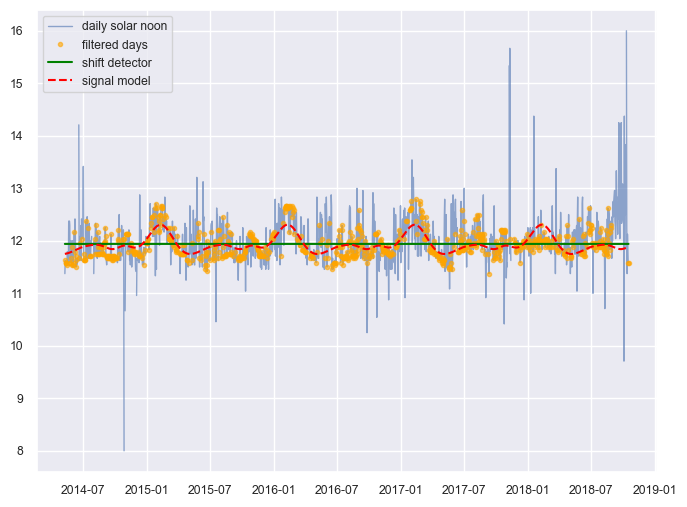

Timeshift:  False
./cassandra/timeshifts/TABGC1044151.csv
total time: 51.78 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              22.01s
Cleaning                   8.60s
Filtering/Summarizing      21.18s
    Data quality           0.80s
    Clear day detect       1.44s
    Clipping detect        0.12s
    Capacity change detect 18.81s



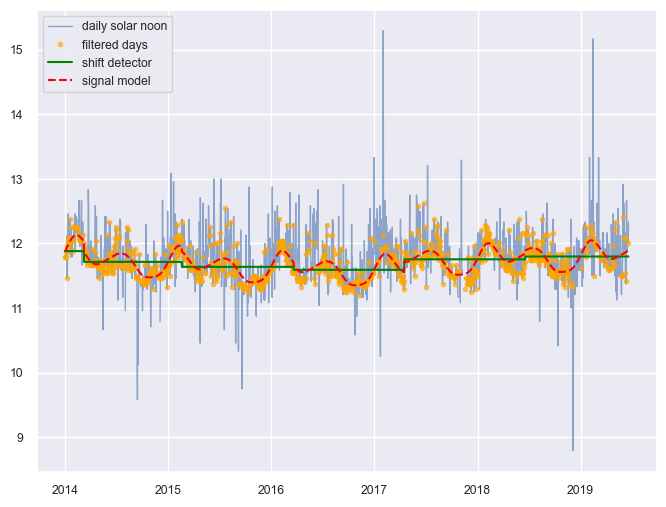

Timeshift:  True
./cassandra/timeshifts/TABB01125140.csv
total time: 10.18 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              2.96s
Cleaning                   4.01s
Filtering/Summarizing      3.22s
    Data quality           0.13s
    Clear day detect       0.31s
    Clipping detect        0.17s
    Capacity change detect 2.60s



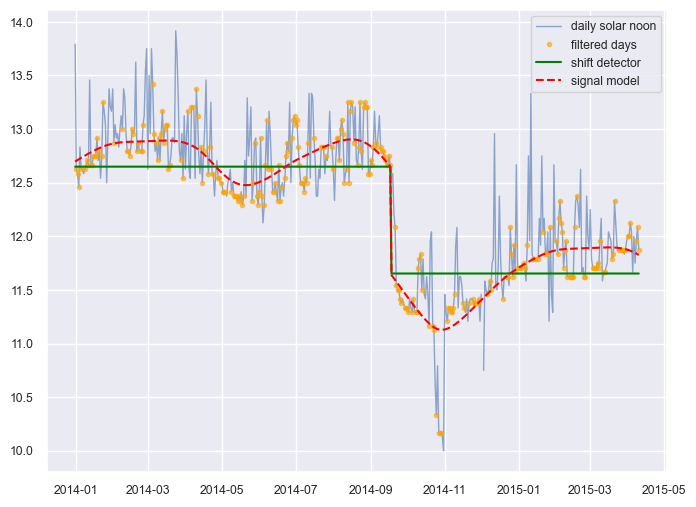

Timeshift:  True
./cassandra/timeshifts/TABA01148025.csv
total time: 50.49 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              22.23s
Cleaning                   8.52s
Filtering/Summarizing      19.74s
    Data quality           0.75s
    Clear day detect       1.53s
    Clipping detect        0.18s
    Capacity change detect 17.29s



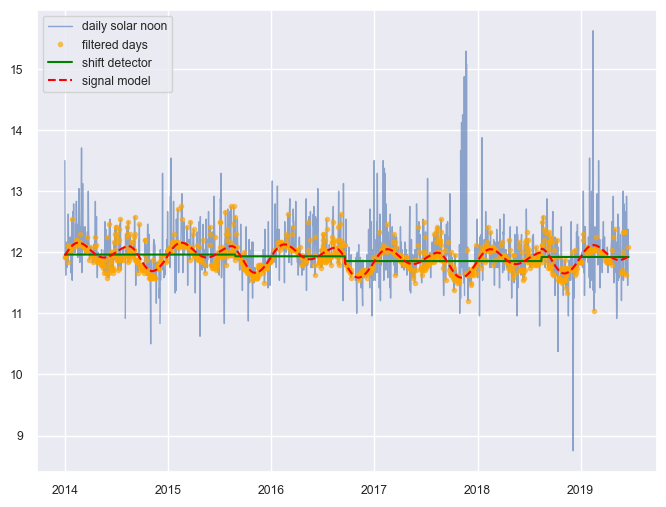

Timeshift:  True
./cassandra/timeshifts/ZT171685000441C1074.csv
total time: 13.00 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              5.33s
Cleaning                   4.62s
Filtering/Summarizing      3.05s
    Data quality           0.19s
    Clear day detect       0.35s
    Clipping detect        0.11s
    Capacity change detect 2.40s



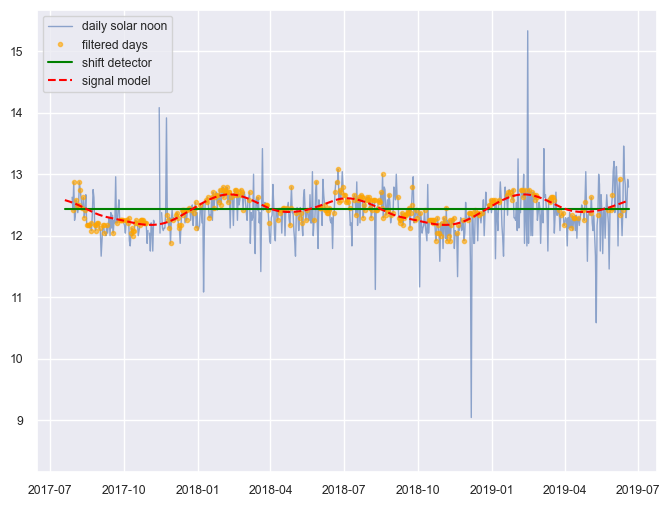

Timeshift:  False
./cassandra/timeshifts/TACHC1020772.csv
total time: 38.93 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              16.43s
Cleaning                   7.31s
Filtering/Summarizing      15.19s
    Data quality           0.56s
    Clear day detect       1.19s
    Clipping detect        0.12s
    Capacity change detect 13.32s



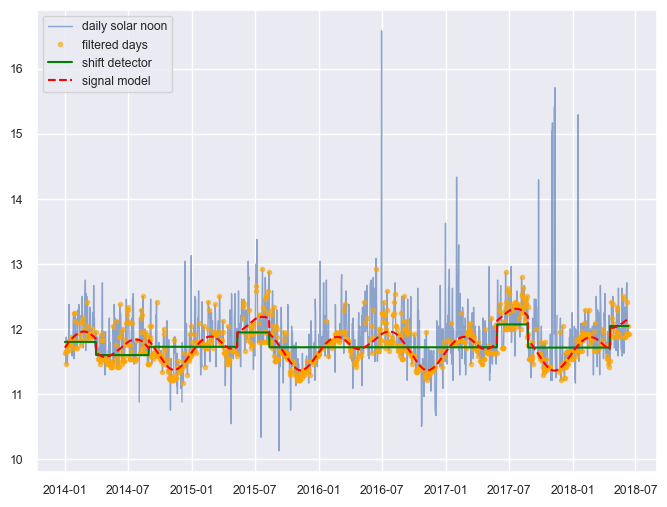

Timeshift:  True
./cassandra/timeshifts/TACHC1022171.csv
total time: 39.14 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              12.66s
Cleaning                   12.93s
Filtering/Summarizing      13.55s
    Data quality           0.43s
    Clear day detect       1.02s
    Clipping detect        0.12s
    Capacity change detect 11.97s



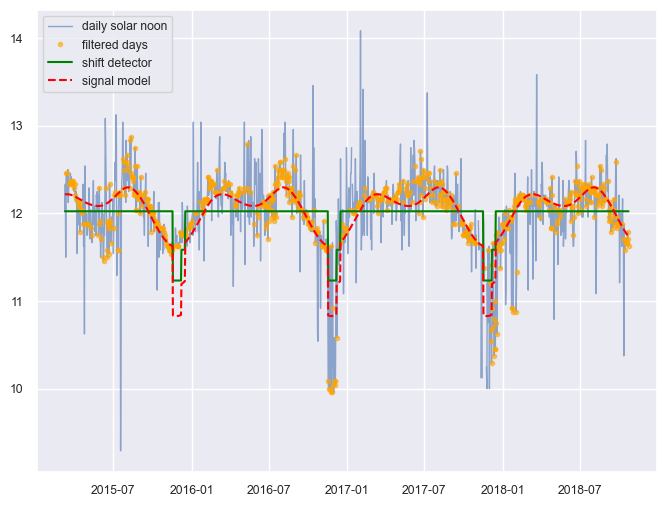

Timeshift:  True
./cassandra/timeshifts/TACHC1022158.csv
total time: 23.29 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              9.69s
Cleaning                   5.81s
Filtering/Summarizing      7.79s
    Data quality           0.35s
    Clear day detect       0.54s
    Clipping detect        0.20s
    Capacity change detect 6.69s



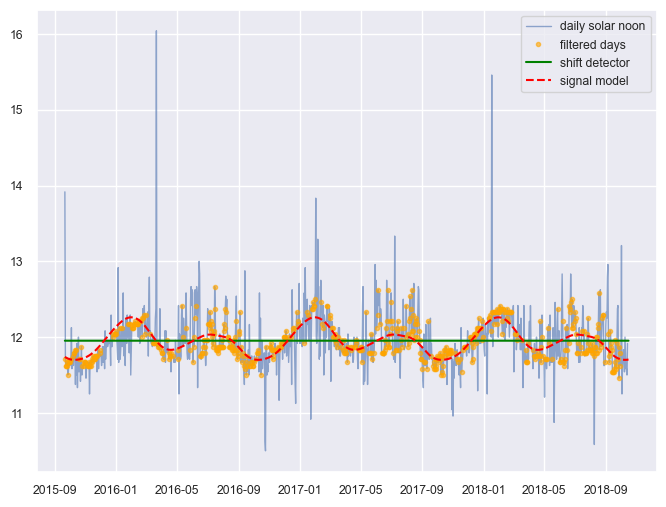

Timeshift:  False
./cassandra/timeshifts/TACIC1066981.csv
total time: 36.66 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              15.87s
Cleaning                   6.94s
Filtering/Summarizing      13.86s
    Data quality           0.50s
    Clear day detect       0.87s
    Clipping detect        0.18s
    Capacity change detect 12.32s



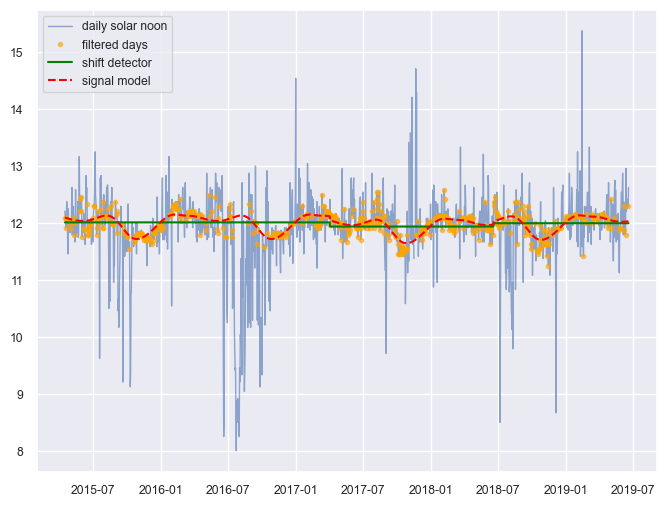

Timeshift:  True
./cassandra/timeshifts/TAEAC1031314.csv
total time: 31.86 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              13.17s
Cleaning                   6.78s
Filtering/Summarizing      11.91s
    Data quality           0.53s
    Clear day detect       0.96s
    Clipping detect        0.12s
    Capacity change detect 10.30s



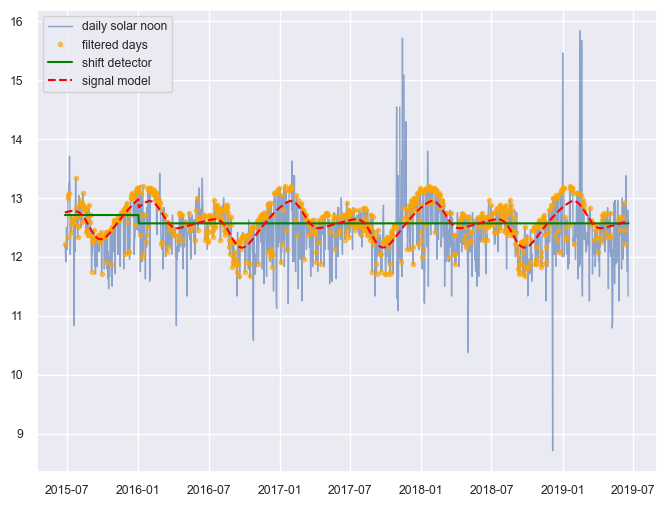

Timeshift:  True
./cassandra/timeshifts/TADKC1043718.csv
total time: 20.70 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              7.84s
Cleaning                   5.40s
Filtering/Summarizing      7.45s
    Data quality           0.32s
    Clear day detect       0.49s
    Clipping detect        0.18s
    Capacity change detect 6.46s



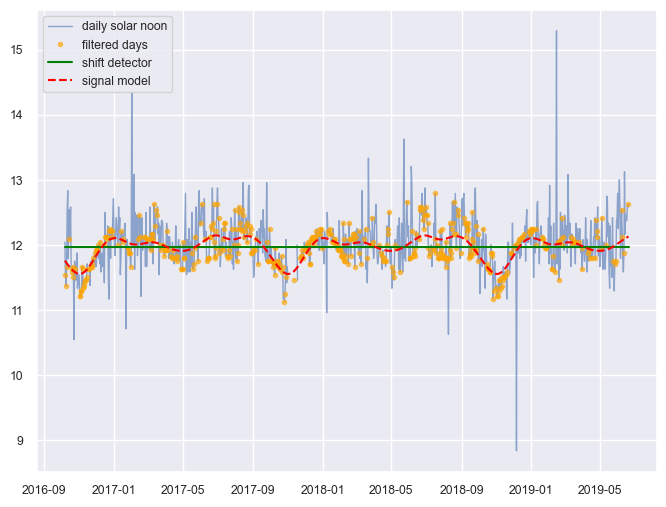

Timeshift:  False
./cassandra/timeshifts/TADBC1077912.csv
total time: 31.61 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              14.55s
Cleaning                   6.99s
Filtering/Summarizing      10.08s
    Data quality           0.52s
    Clear day detect       1.16s
    Clipping detect        0.12s
    Capacity change detect 8.28s



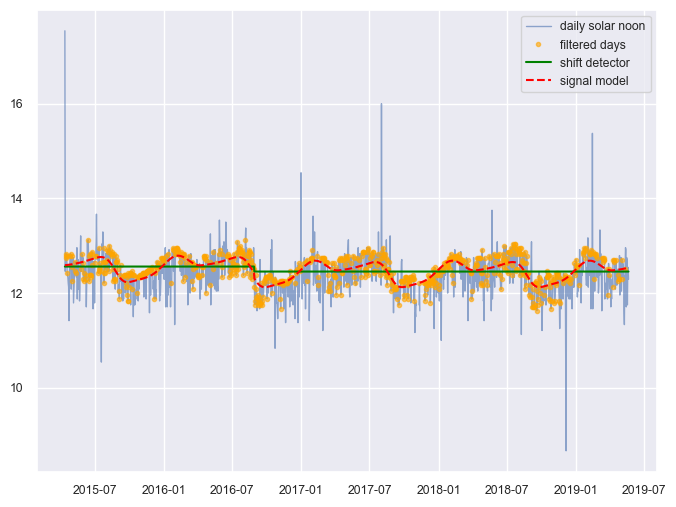

Timeshift:  True
./cassandra/timeshifts/TAAJ01021775.csv
total time: 41.13 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              14.15s
Cleaning                   7.12s
Filtering/Summarizing      19.86s
    Data quality           0.47s
    Clear day detect       1.52s
    Clipping detect        0.17s
    Capacity change detect 17.70s



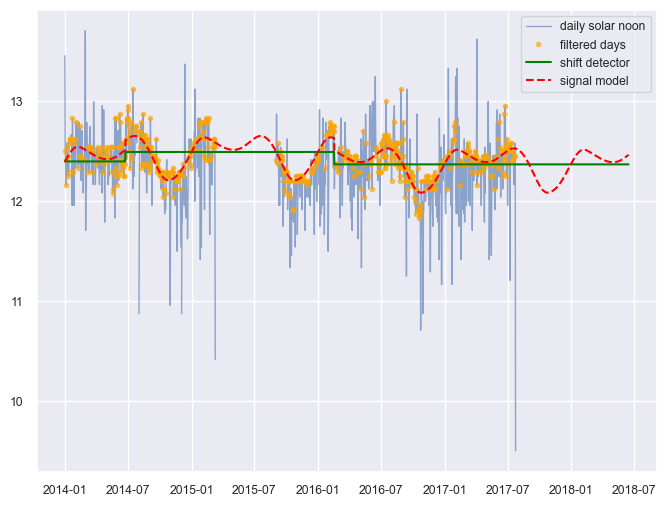

Timeshift:  True
./cassandra/timeshifts/TADBC1076739.csv
Fix time shift algorithm failed.
Error message: All-NaN slice encountered




Traceback (most recent call last):
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_handler.py", line 428, in run_pipeline
    self.auto_fix_time_shifts(
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_handler.py", line 962, in auto_fix_time_shifts
    self.time_shift_analysis.run(
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/algorithms/time_shifts.py", line 73, in run
    hn, rn, tv_metric, jpy, best_ix = self.optimize_c1(
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/algorithms/time_shifts.py", line 200, in optimize_c1
    best_ix = subset_ixs[np.nanargmin(hn[subset_ixs])]
  File "<__array_function__ internals>", line 180, in nanargmin
  File "/Users/smiskov/opt/anaconda3/envs/pvi-dev-sara/lib/python3.10/site-packages/numpy/lib/nanfunctions.py", line 553, in nanargmin
    raise ValueError("All-NaN slice encountered")
ValueError: All-NaN slice e

total time: 52.54 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              16.53s
Cleaning                   13.71s
Filtering/Summarizing      22.30s
    Data quality           0.55s
    Clear day detect       1.35s
    Clipping detect        0.12s
    Capacity change detect 20.28s



ValueError: x, y, and format string must not be None

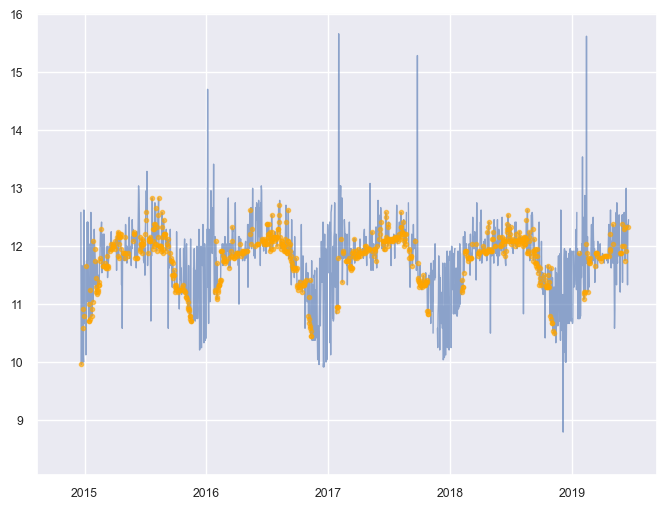

In [51]:
paths = ["./cassandra/timeshifts/*.csv"]

#cassandra_data = {}
true_list = []
for path in paths:
    for fname in glob.glob(path):
        print(fname)
        df = pd.read_csv(fname)
        
        from solardatatools import DataHandler
        dh = DataHandler(df, convert_to_ts=True)
        dh.run_pipeline(power_col=dh.keys[0][-1], fix_shifts=True, verbose=True)
        #power_data_matrix = dh.filled_data_matrix
        dh.plot_time_shift_analysis_results()
        plt.show()
        print(f"Timeshift: ", dh.time_shifts)
        
        if dh.time_shifts:
            true_list.append(fname)

In [5]:
cassandra_data.keys()

dict_keys(['./cassandra/timeshifts/TABB01125140.csv', './cassandra/timeshifts/TACIC1066981.csv', './cassandra/timeshifts/ZT171685000441C1081.csv'])

In [29]:
paths = ["./cassandra/timeshifts/*.csv"]
ts_paths = []
#cassandra_data = {}
for path in paths:
    for fname in glob.glob(path):
        ts_paths.append(fname)

In [7]:
# paths = list(cassandra_data.keys()) # only those with timeshift

# cassandra_data = {}
# for path in paths:
#     for fname in glob.glob(path):
#         print(fname)
#         df = pd.read_csv(fname)
#         dh = DataHandler(df, convert_to_ts=True)
#         dh.run_pipeline(power_col=dh.keys[0][-1], fix_shifts=False, verbose=True)
#         power_data_matrix = dh.filled_data_matrix
#         cassandra_data[fname] = power_data_matrix
        
# paths = list(cassandra_data.keys())

In [9]:
# paths = ['./cassandra/timeshifts/TABB01125140.csv', './cassandra/timeshifts/ZT171685000441C1081.csv']

In [11]:
ts_paths = ['./cassandra/timeshifts/TABJC1067646.csv',
 './cassandra/timeshifts/TABB01125140.csv',
 './cassandra/timeshifts/TADHC1036570.csv',
 './cassandra/timeshifts/TACHC1022171.csv',
 './cassandra/timeshifts/TAEAC1031314.csv']

# Current plots w/ L2norm

TABF01017766
L2 norm
Timeshift: True


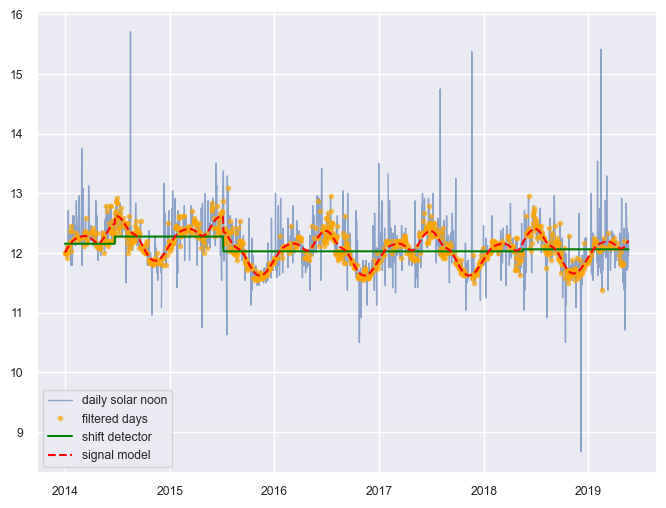

TABGC1044151
L2 norm
Timeshift: True


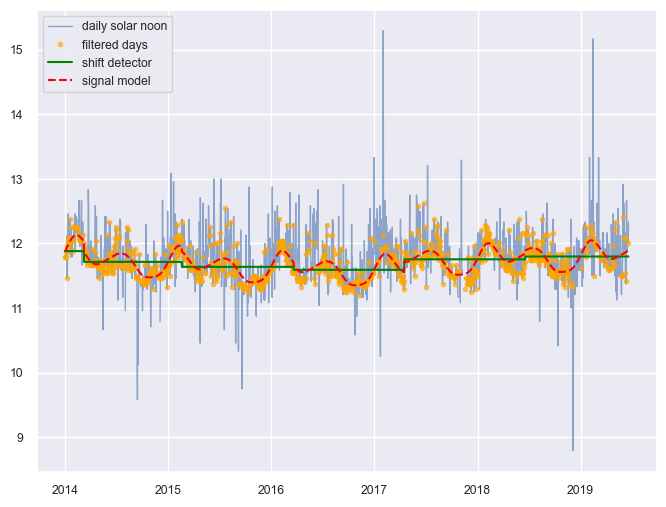

TABB01125140
L2 norm
Timeshift: True


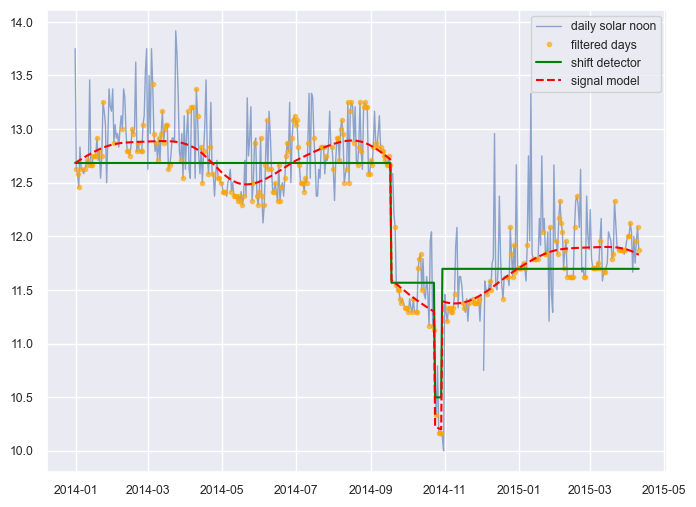

TABA01148025
L2 norm
Timeshift: False


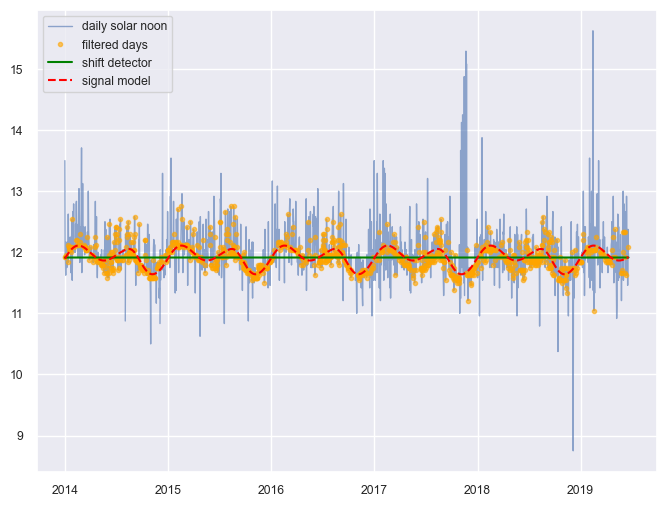

TACHC1020772
L2 norm
Timeshift: True


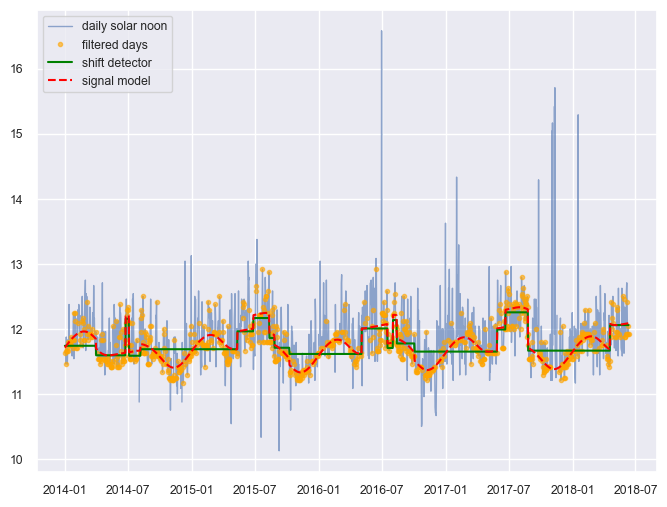

TACHC1022171
L2 norm
Timeshift: True


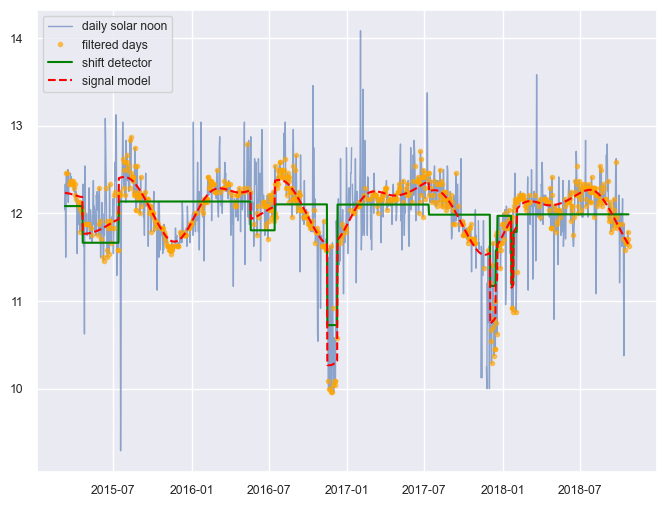

TACIC1066981
L2 norm
Timeshift: False


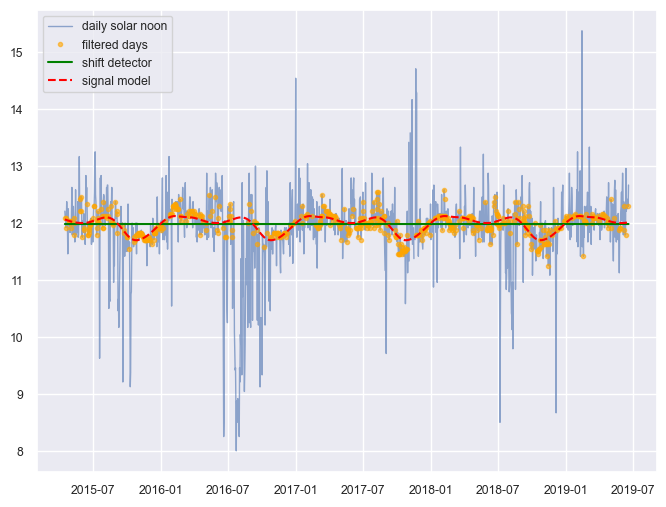

TAEAC1031314
L2 norm
Timeshift: False


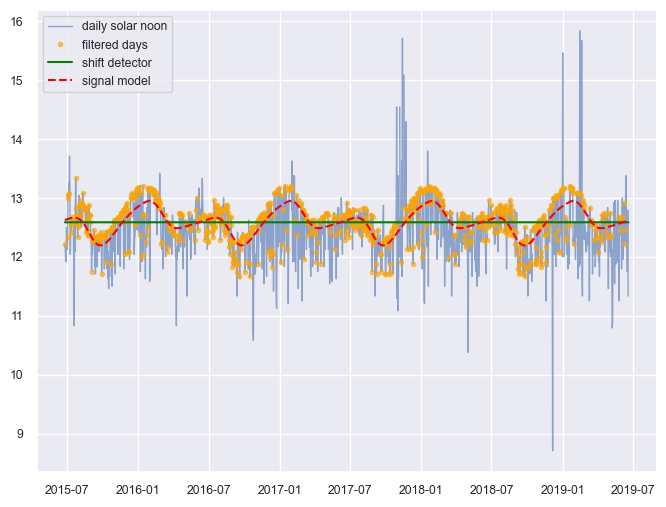

TADBC1077912
L2 norm
Timeshift: True


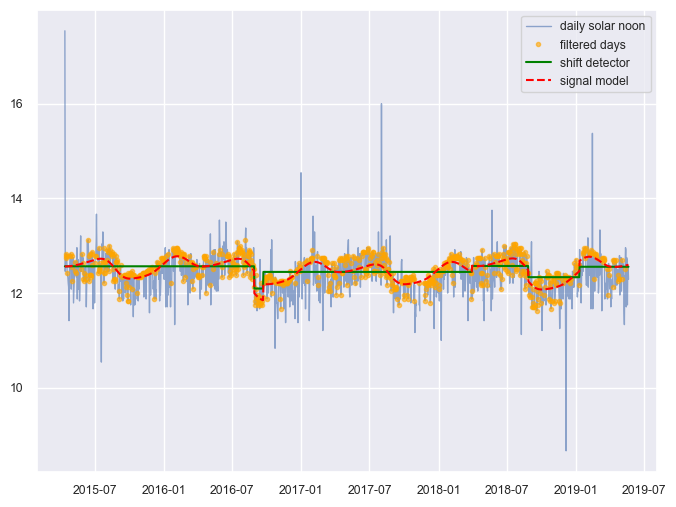

TAAJ01021775
L2 norm
Timeshift: True


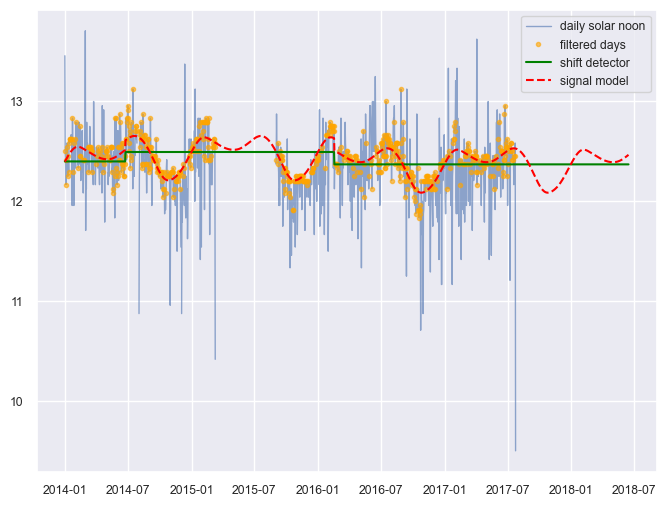

In [67]:
l2_decomp = {}
for path in true_list: #true_list:
    print(path[23:-4])

    df = pd.read_csv(path)
    from solardatatools import DataHandler
    dh = DataHandler(df, convert_to_ts=True)
    #dh.l2norm = True 
    
    
    dh.run_pipeline(power_col=dh.keys[0][-1], fix_shifts=True, verbose=False, solver="MOSEK")#, c1=5, c2=500)
    print("L2 norm")
    print(f"Timeshift: {dh.time_shifts}")
    dh.plot_time_shift_analysis_results()
    l2_decomp[path] = (dh.time_shift_analysis.s1, dh.time_shift_analysis.s2)
    plt.show()

# Finding a good region for c2 with sumsquares
Looks like 1e4 to 1e6

TABGC1044151
total time: 16.72 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              3.73s
Cleaning                   10.81s
Filtering/Summarizing      2.18s
    Data quality           0.28s
    Clear day detect       0.63s
    Clipping detect        0.14s
    Capacity change detect 1.13s

SS


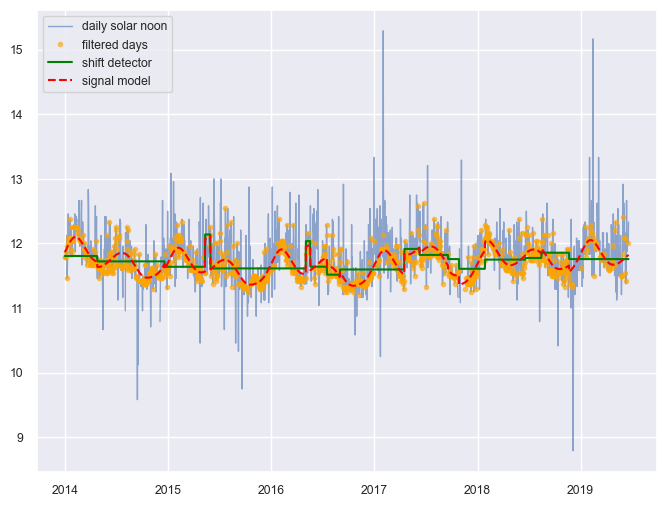

TABB01125140
total time: 5.20 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              1.67s
Cleaning                   2.74s
Filtering/Summarizing      0.79s
    Data quality           0.09s
    Clear day detect       0.15s
    Clipping detect        0.18s
    Capacity change detect 0.37s

SS


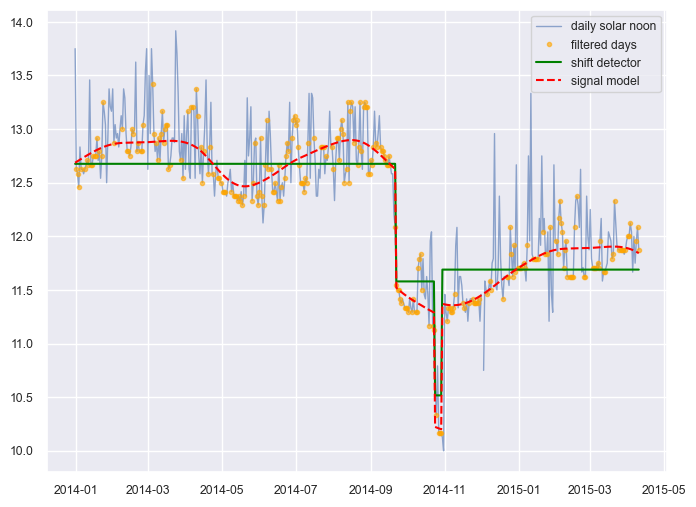

TACHC1022171
total time: 9.21 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              2.87s
Cleaning                   4.57s
Filtering/Summarizing      1.76s
    Data quality           0.22s
    Clear day detect       0.46s
    Clipping detect        0.22s
    Capacity change detect 0.86s

SS


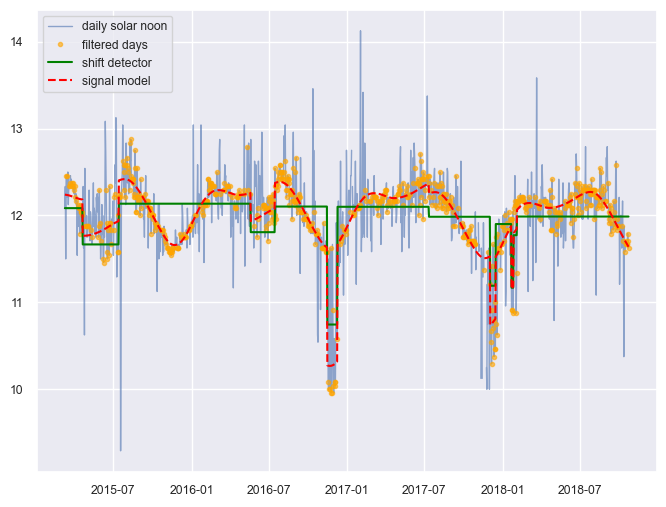

TACHC1022158
total time: 7.92 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              2.50s
Cleaning                   4.17s
Filtering/Summarizing      1.25s
    Data quality           0.19s
    Clear day detect       0.21s
    Clipping detect        0.16s
    Capacity change detect 0.68s

SS


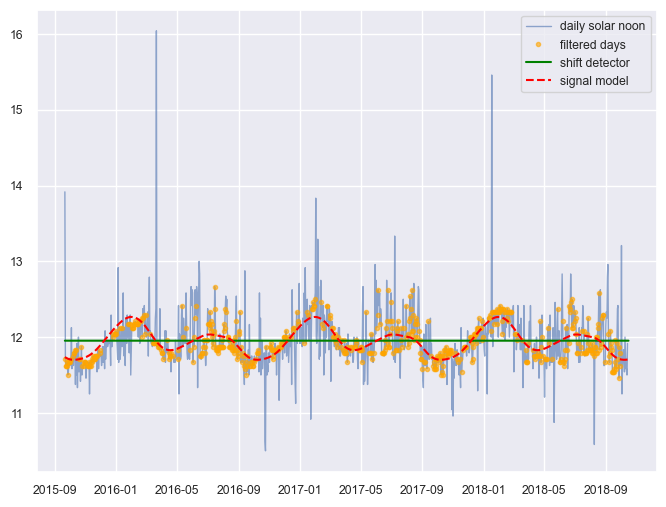

TADKC1043718
total time: 8.21 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              2.51s
Cleaning                   4.58s
Filtering/Summarizing      1.12s
    Data quality           0.15s
    Clear day detect       0.22s
    Clipping detect        0.16s
    Capacity change detect 0.60s

SS


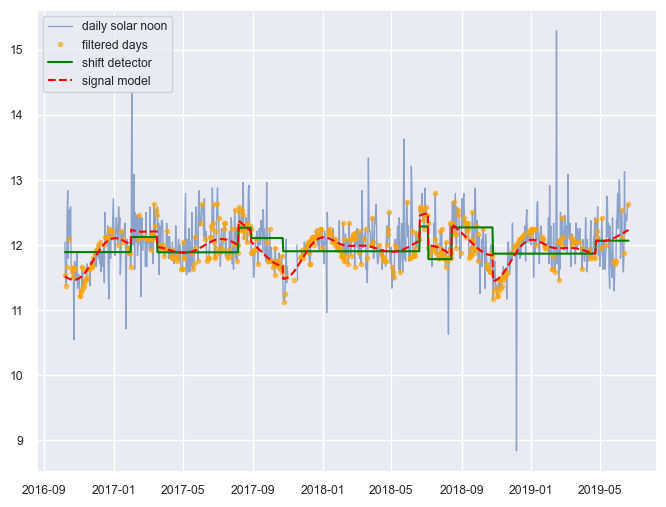

TAAJ01021775
total time: 11.30 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              3.66s
Cleaning                   5.12s
Filtering/Summarizing      2.51s
    Data quality           0.29s
    Clear day detect       0.95s
    Clipping detect        0.26s
    Capacity change detect 1.02s

SS


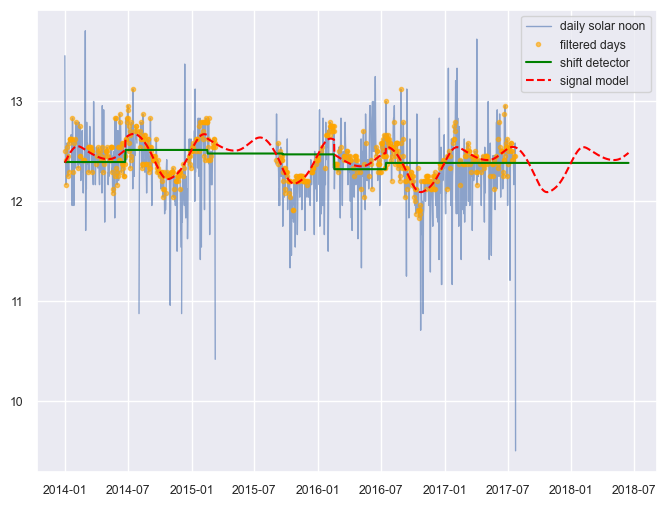

In [33]:
for path in ts_paths: #true_list:
    print(path[23:-4])

    df = pd.read_csv(path)
    
    from solardatatools import DataHandler
    dh2 = DataHandler(df, convert_to_ts=True)
    dh2.l2norm = False 
    dh2.run_pipeline(power_col=dh.keys[0][-1], fix_shifts=True, verbose=True, c2=33614, solver="MOSEK")
    print("SS")
    dh2.plot_time_shift_analysis_results()
    plt.show()

# Optimize C2 

In [34]:
results = {}

In [40]:
ts_paths = ts_paths[1:]

In [64]:
np.log10(80000)

4.903089986991944

In [65]:
weight_iter = np.logspace(4.7, 5, 50) # original c2=500

def run(sig):
    mae_list_s1 = []
    mae_list_s2 = []
    
    df = pd.read_csv(sig)
    for w in tqdm(weight_iter):
        from solardatatools import DataHandler
        dh2 = DataHandler(df, convert_to_ts=True)
        dh2.l2norm = False 
        dh2.run_pipeline(power_col=dh2.keys[0][-1], fix_shifts=True, verbose=False, c2=w, solver="MOSEK")
        # print(dh2.time_shifts)
        # dh2.plot_time_shift_analysis_results()
        # plt.show()

        mae_list_s1.append(mae(dh2.time_shift_analysis.s1, l2_decomp[path][0]))
        mae_list_s2.append(mae(dh2.time_shift_analysis.s2, l2_decomp[path][1]))
        
    return weight_iter[np.argmin(mae_list_s1)], np.min(mae_list_s1), mae_list_s1, \
weight_iter[np.argmin(mae_list_s2)], np.min(mae_list_s2), mae_list_s2

# Running cell below

TABF01017766


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [12:10<00:00, 14.62s/it]


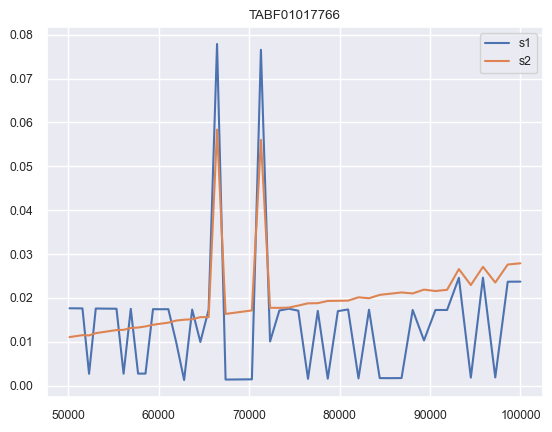

TABGC1044151


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [13:12<00:00, 15.85s/it]


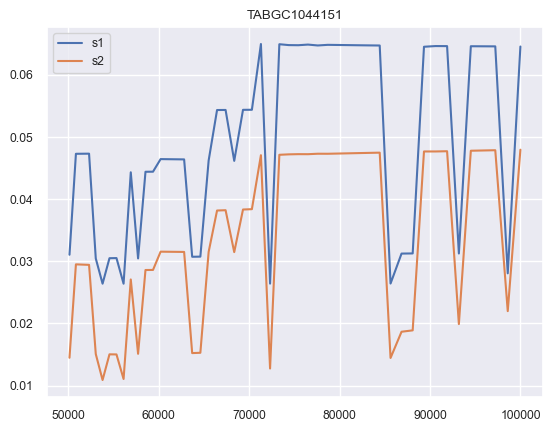

TABB01125140


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 35/50 [03:55<01:41,  6.74s/it]


TypeError: Singleton array array(None, dtype=object) cannot be considered a valid collection.

In [69]:
for path in true_list:
    print(path[23:-4])
    r = run(path)
    
    results[f"{path}_weight_min_s1"] =  r[0]
    results[f"{path}_mae_min_s1"] = r[1]
    results[f"{path}_mae_list_s1"] = r[2]
    
    results[f"{path}_weight_min_s2"] =  r[3]
    results[f"{path}_mae_min_s2"] = r[4]
    results[f"{path}_mae_list_s2"] = r[5]
    
    plt.plot(weight_iter, results[f"{path}_mae_list_s1"], label="s1")
    plt.plot(weight_iter, results[f"{path}_mae_list_s2"], label="s2")
    plt.legend()
    plt.title(path[23:-4])
    plt.show()

TABB01125140


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:57<00:00,  5.94s/it]


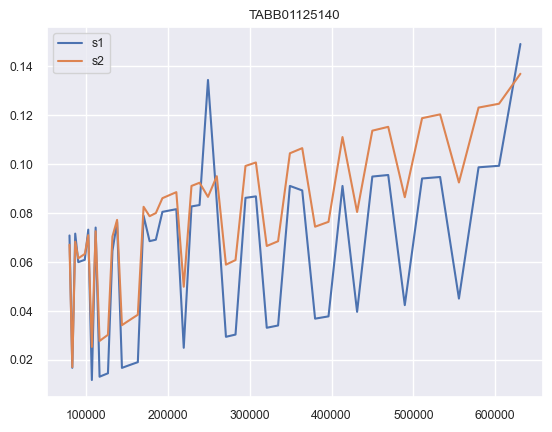

TACHC1022171


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [10:14<00:00, 12.28s/it]


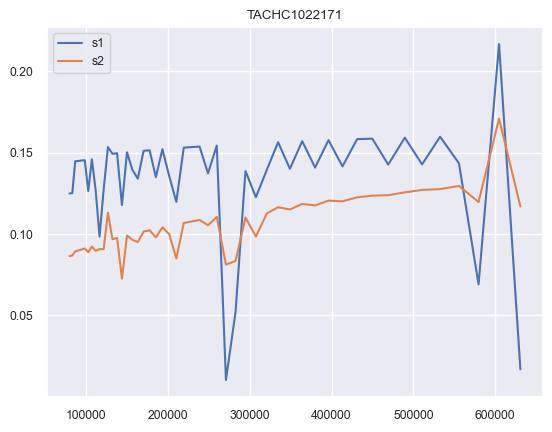

TACHC1022158


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [08:27<00:00, 10.15s/it]


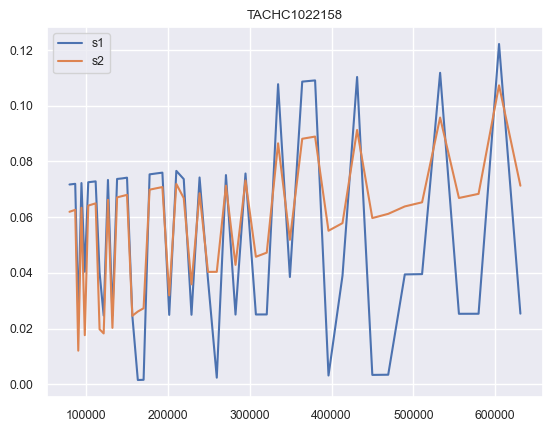

TADKC1043718


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [07:13<00:00,  8.67s/it]


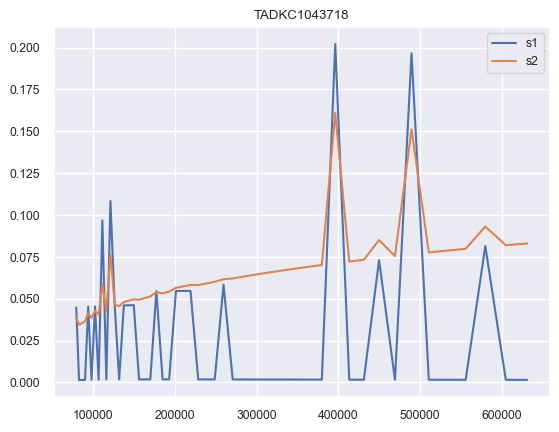

TAAJ01021775


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [13:46<00:00, 16.53s/it]


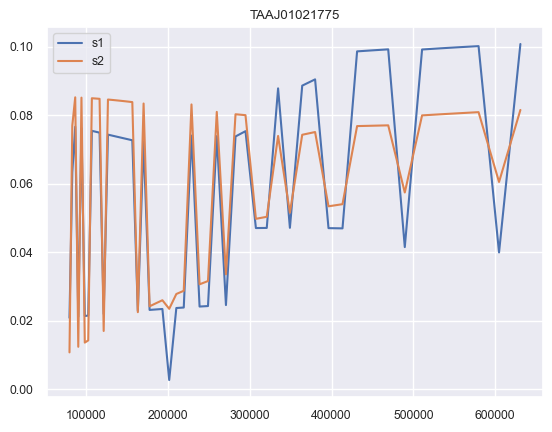

In [42]:
for path in ts_paths:
    print(path[23:-4])
    r = run(path)
    
    results[f"{path}_weight_min_s1"] =  r[0]
    results[f"{path}_mae_min_s1"] = r[1]
    results[f"{path}_mae_list_s1"] = r[2]
    
    results[f"{path}_weight_min_s2"] =  r[3]
    results[f"{path}_mae_min_s2"] = r[4]
    results[f"{path}_mae_list_s2"] = r[5]
    
    plt.plot(weight_iter, results[f"{path}_mae_list_s1"], label="s1")
    plt.plot(weight_iter, results[f"{path}_mae_list_s2"], label="s2")
    plt.legend()
    plt.title(path[23:-4])
    plt.show()

In [19]:
r

In [45]:
w_list = []
for path in ts_paths:
    print(path[23:-4], f'{results[f"{path}_weight_min_s1"]:.2f}')
    w_list.append(results[f"{path}_weight_min_s1"])

TABB01125140 106800.04
TACHC1022171 270802.74
TACHC1022158 163021.50
TADKC1043718 82864.28
TAAJ01021775 201410.28


In [52]:
w_list = []
for path in ts_paths:
    print(path[23:-4], f'{results[f"{path}_weight_min_s2"]:.2f}')
    w_list.append(results[f"{path}_weight_min_s2"])

TABB01125140 82864.28
TACHC1022171 143596.17
TACHC1022158 90178.30
TADKC1043718 82864.28
TAAJ01021775 79432.82


In [53]:
np.median(w_list)

82864.27728546843

In [24]:
for path in true_list:
    print(path[23:-4], f'{results[f"{path}_weight_min_s2"]:.2f}')

TABB01125140 33614.81


KeyError: './cassandra/timeshifts/TACHC1022171.csv_weight_min_s2'

In [65]:
paths = ["./cassandra/timeshifts/*.csv"]

# cassandra_data = {}
# for path in paths:
#     for fname in glob.glob(path):
#         print(fname)
#         df = pd.read_csv(fname)
#         # data = df["meas_val_f"] # ac power
#         dh = DataHandler(df, convert_to_ts=True)
#         dh.run_pipeline(power_col=dh.keys[0][-1], fix_shifts=True, verbose=False)
#         power_data_matrix = dh.filled_data_matrix
#         print(f"Timeshift: ", dh.time_shifts)
        
#         if dh.time_shifts:
#             cassandra_data[fname] = power_data_matrix

TABB01125140
L2 norm
Timeshift: True


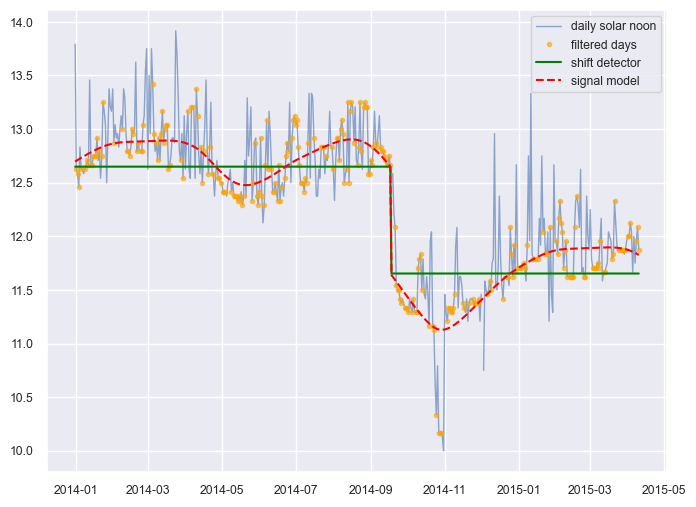

total time: 5.64 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              1.84s
Cleaning                   3.01s
Filtering/Summarizing      0.79s
    Data quality           0.08s
    Clear day detect       0.15s
    Clipping detect        0.16s
    Capacity change detect 0.39s

SS


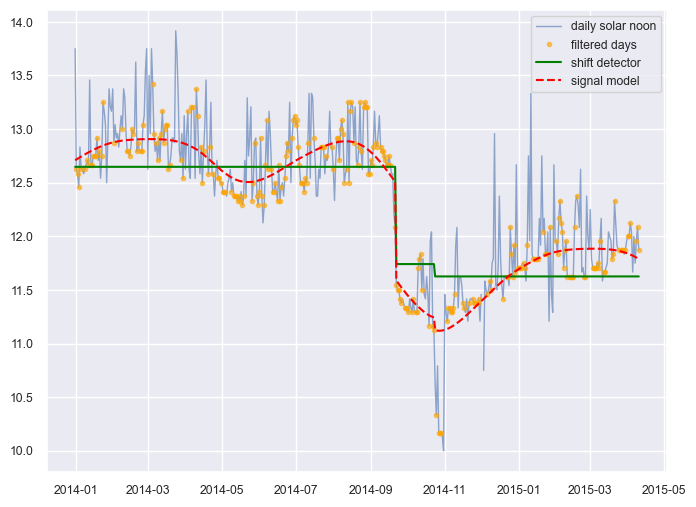

In [95]:
for path in true_list:
    print(path[23:-4])

    df = pd.read_csv(path)
    
    from solardatatools import DataHandler
    dh = DataHandler(df, convert_to_ts=True)
    #dh.l2norm = True 
    
    dh.run_pipeline(power_col=dh.keys[0][-1], fix_shifts=True, verbose=False, solver="MOSEK")#, c1=5, c2=500)
    print("L2 norm")
    print(f"Timeshift: {dh.time_shifts}")
    dh.plot_time_shift_analysis_results()
    l2_decomp[path] = (dh.time_shift_analysis.s1, dh.time_shift_analysis.s2)
    plt.show()
    
    
    from solardatatools import DataHandler
    dh2 = DataHandler(df, convert_to_ts=True)
    dh2.l2norm = False 
    dh2.run_pipeline(power_col=dh.keys[0][-1], fix_shifts=True, verbose=True, c2=63991.52, solver="MOSEK")
    print("SS")
    dh2.plot_time_shift_analysis_results()
    plt.show()
    
    break

In [105]:
len(weight_iter[:27])

27

TABB01125140
total time: 28.10 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              2.34s
Cleaning                   24.68s
Filtering/Summarizing      1.08s
    Data quality           0.13s
    Clear day detect       0.20s
    Clipping detect        0.22s
    Capacity change detect 0.53s

SS


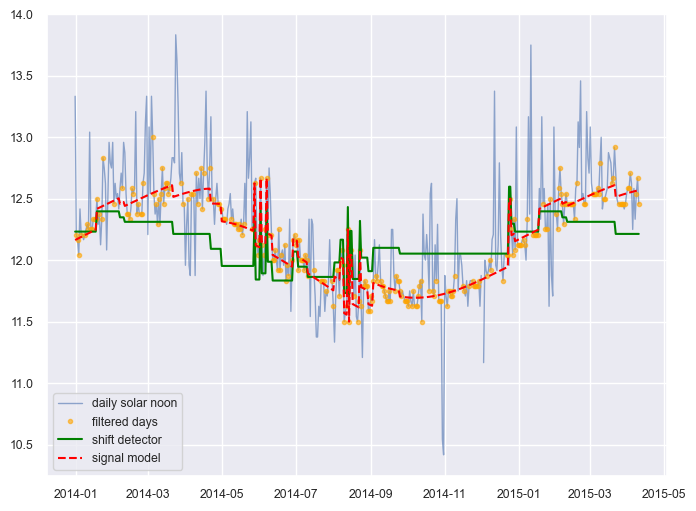

In [110]:
for path in true_list:
    print(path[23:-4])

    df = pd.read_csv(path)
    
    from solardatatools import DataHandler
    dh2 = DataHandler(df, convert_to_ts=True)
    dh2.l2norm = False 
    dh2.run_pipeline(power_col=dh.keys[0][-1], fix_shifts=True, verbose=True, c2=weight_iter[29], solver="MOSEK")
    print("SS")
    dh2.plot_time_shift_analysis_results()
    plt.show()
    
    break

TABB01125140
total time: 7.56 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              2.35s
Cleaning                   4.13s
Filtering/Summarizing      1.08s
    Data quality           0.12s
    Clear day detect       0.21s
    Clipping detect        0.22s
    Capacity change detect 0.52s

SS


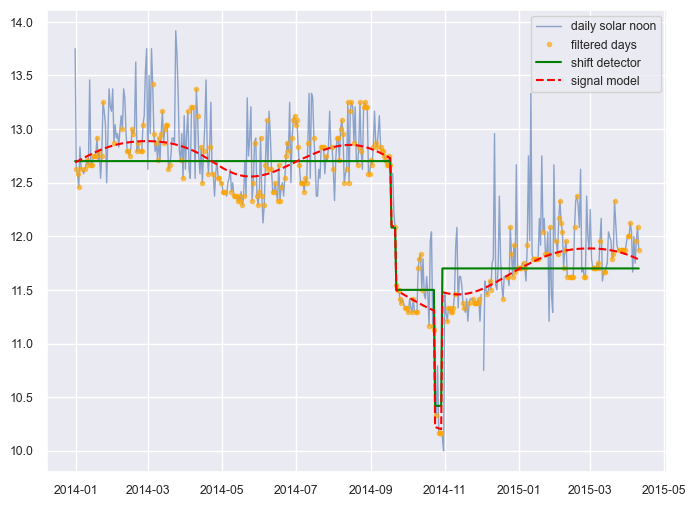

In [111]:
for path in true_list:
    print(path[23:-4])

    df = pd.read_csv(path)
    
    from solardatatools import DataHandler
    dh2 = DataHandler(df, convert_to_ts=True)
    dh2.l2norm = False 
    dh2.run_pipeline(power_col=dh.keys[0][-1], fix_shifts=True, verbose=True, c2=weight_iter[29], solver="MOSEK")
    print("SS")
    dh2.plot_time_shift_analysis_results()
    plt.show()
    
    break

In [5]:
true_list = ['./cassandra/timeshifts/TABB01125140.csv',
 './cassandra/timeshifts/TACHC1022171.csv']

TABB01125140
total time: 11.69 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              2.40s
Cleaning                   8.16s
Filtering/Summarizing      1.12s
    Data quality           0.13s
    Clear day detect       0.22s
    Clipping detect        0.23s
    Capacity change detect 0.54s

SS


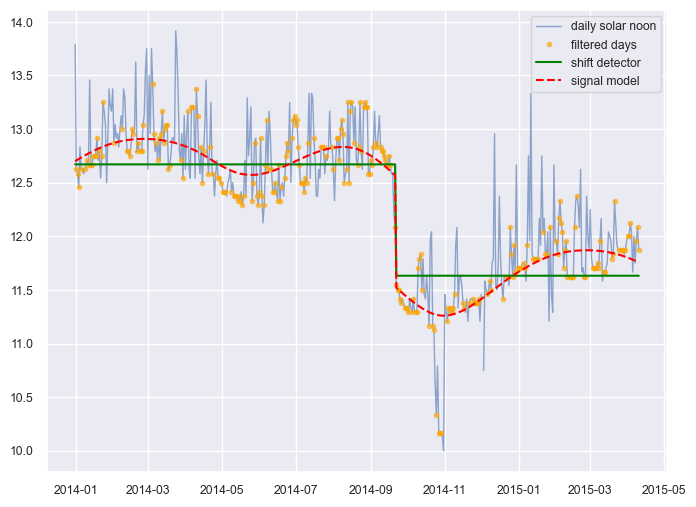

In [9]:
for path in true_list:
    print(path[23:-4])

    df = pd.read_csv(path)
    
    from solardatatools import DataHandler
    dh2 = DataHandler(df, convert_to_ts=True)
    dh2.l2norm = False 
    dh2.run_pipeline(power_col=dh2.keys[0][-1], fix_shifts=True, verbose=True, c2=185946.39162879216, solver="MOSEK")
    print("SS")
    dh2.plot_time_shift_analysis_results()
    plt.show()
    
    break

# w/ median = 82864 from S2

TABF01017766
total time: 17.01 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              6.05s
Cleaning                   8.13s
Filtering/Summarizing      2.83s
    Data quality           0.46s
    Clear day detect       0.58s
    Clipping detect        0.23s
    Capacity change detect 1.57s

SS


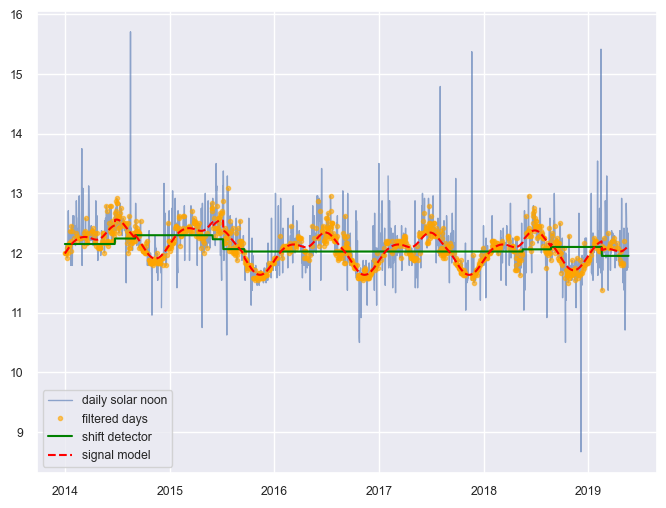

TABGC1044151
total time: 24.69 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              5.50s
Cleaning                   15.95s
Filtering/Summarizing      3.24s
    Data quality           0.45s
    Clear day detect       0.89s
    Clipping detect        0.22s
    Capacity change detect 1.69s

SS


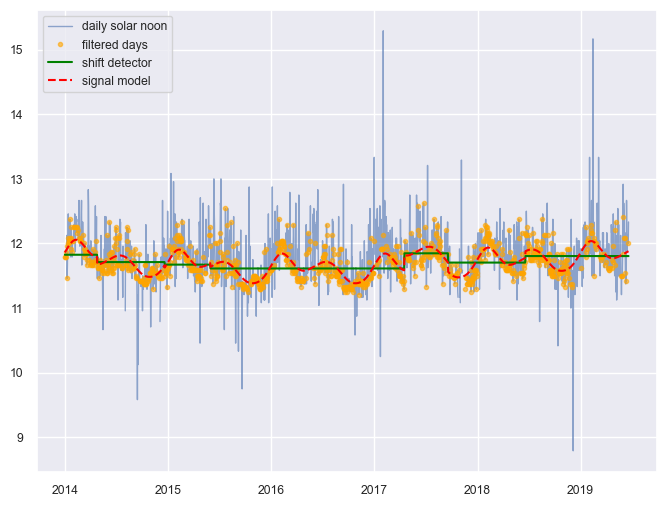

TABB01125140
total time: 7.78 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              2.44s
Cleaning                   4.26s
Filtering/Summarizing      1.09s
    Data quality           0.12s
    Clear day detect       0.21s
    Clipping detect        0.22s
    Capacity change detect 0.52s

SS


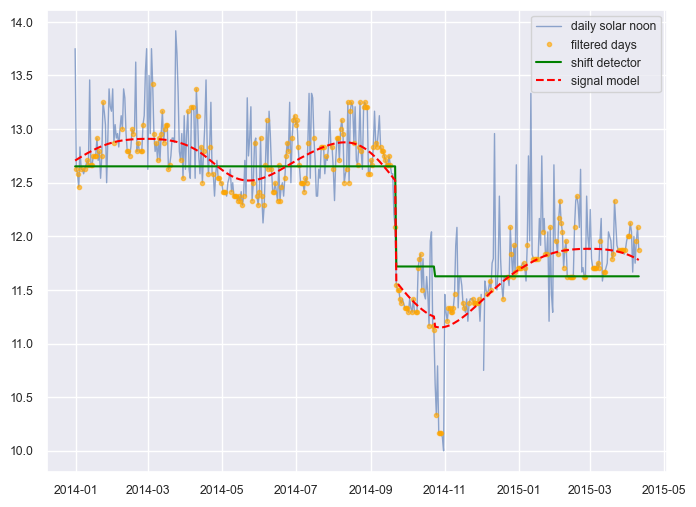

TABA01148025
total time: 17.38 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              5.67s
Cleaning                   8.16s
Filtering/Summarizing      3.55s
    Data quality           0.68s
    Clear day detect       1.02s
    Clipping detect        0.23s
    Capacity change detect 1.62s

SS


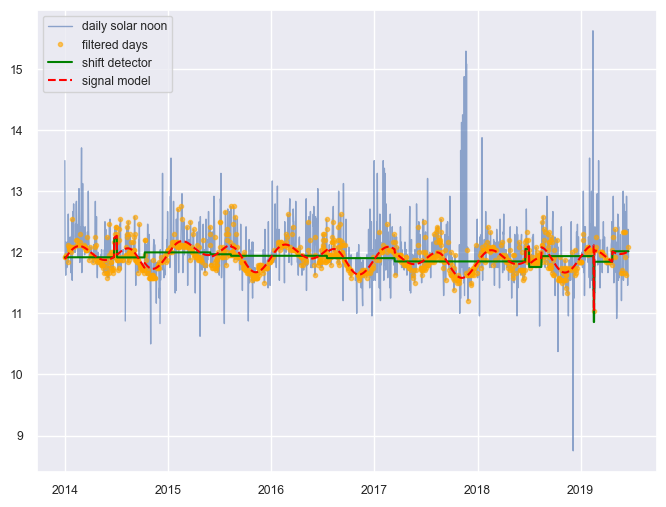

TACHC1020772
total time: 14.75 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              4.81s
Cleaning                   7.25s
Filtering/Summarizing      2.69s
    Data quality           0.35s
    Clear day detect       0.81s
    Clipping detect        0.22s
    Capacity change detect 1.30s

SS


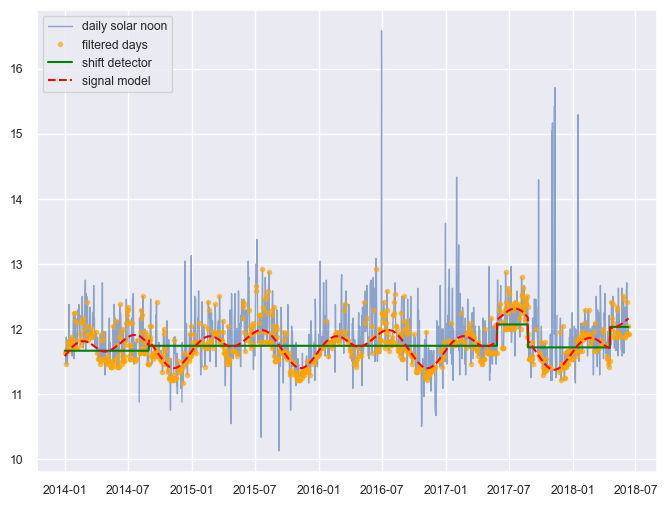

TACHC1022171
total time: 19.21 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              4.22s
Cleaning                   12.68s
Filtering/Summarizing      2.31s
    Data quality           0.30s
    Clear day detect       0.69s
    Clipping detect        0.23s
    Capacity change detect 1.09s

SS


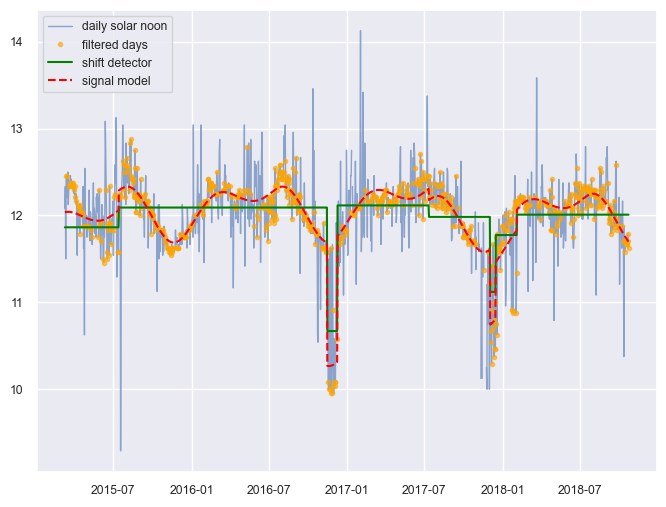

TACIC1066981
total time: 14.23 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              4.78s
Cleaning                   7.05s
Filtering/Summarizing      2.41s
    Data quality           0.34s
    Clear day detect       0.67s
    Clipping detect        0.22s
    Capacity change detect 1.18s

SS


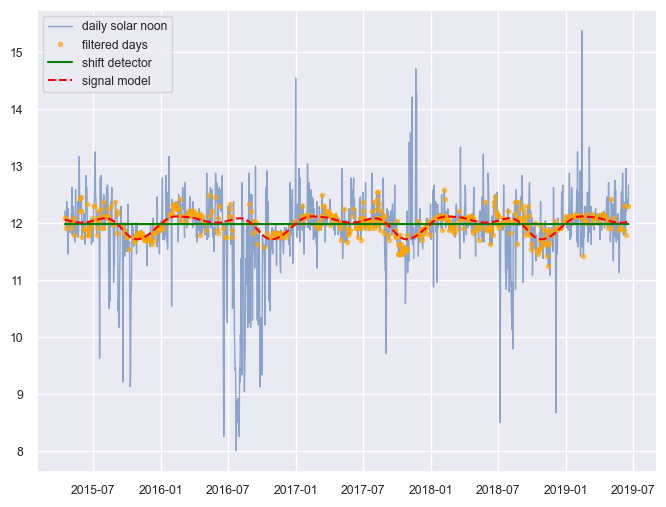

TAEAC1031314
total time: 14.08 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              4.46s
Cleaning                   7.18s
Filtering/Summarizing      2.44s
    Data quality           0.33s
    Clear day detect       0.68s
    Clipping detect        0.22s
    Capacity change detect 1.21s

SS


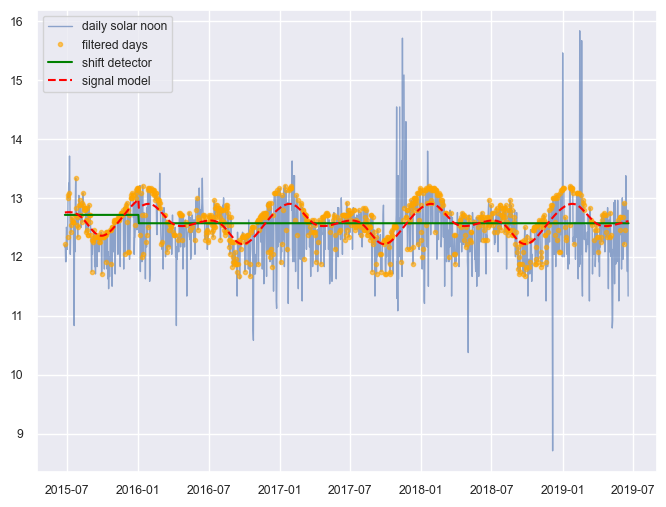

TADBC1077912
total time: 14.16 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              4.47s
Cleaning                   7.08s
Filtering/Summarizing      2.60s
    Data quality           0.34s
    Clear day detect       0.86s
    Clipping detect        0.21s
    Capacity change detect 1.19s

SS


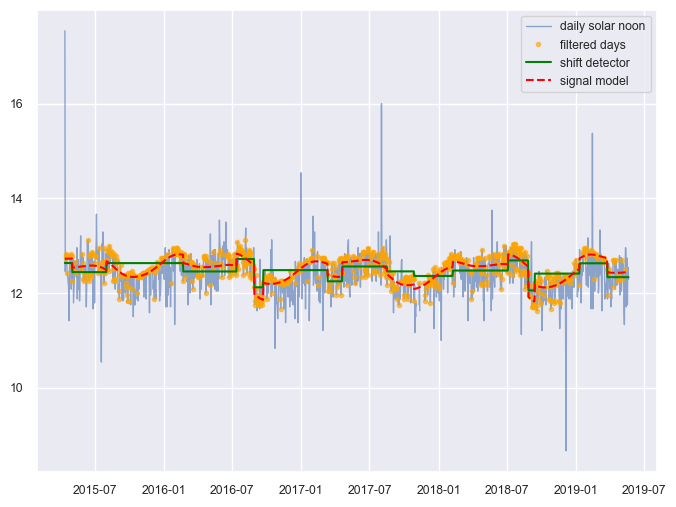

TAAJ01021775
total time: 21.74 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              4.68s
Cleaning                   14.32s
Filtering/Summarizing      2.75s
    Data quality           0.32s
    Clear day detect       1.06s
    Clipping detect        0.22s
    Capacity change detect 1.15s

SS


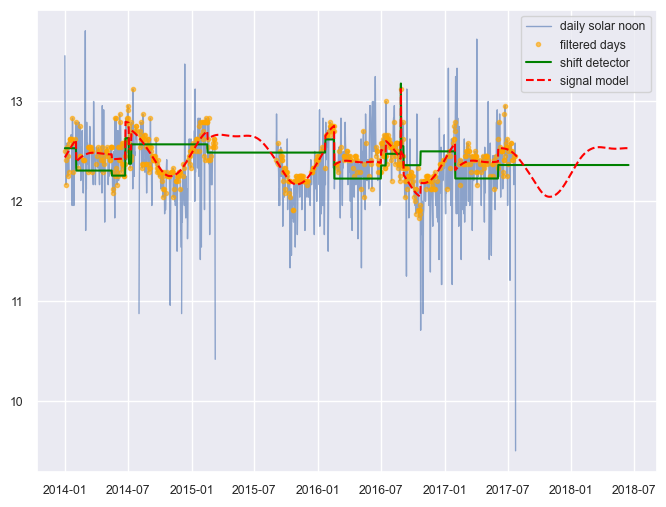

In [57]:
for path in true_list:
    print(path[23:-4])

    df = pd.read_csv(path)
    
    from solardatatools import DataHandler
    dh2 = DataHandler(df, convert_to_ts=True)
    dh2.l2norm = False 
    dh2.run_pipeline(power_col=dh2.keys[0][-1], fix_shifts=True, verbose=True, c2=82864.27, solver="MOSEK")
    print("SS")
    dh2.plot_time_shift_analysis_results()
    plt.show()

In [60]:
true_list

['./cassandra/timeshifts/TABF01017766.csv',
 './cassandra/timeshifts/TABGC1044151.csv',
 './cassandra/timeshifts/TABB01125140.csv',
 './cassandra/timeshifts/TABA01148025.csv',
 './cassandra/timeshifts/TACHC1020772.csv',
 './cassandra/timeshifts/TACHC1022171.csv',
 './cassandra/timeshifts/TACIC1066981.csv',
 './cassandra/timeshifts/TAEAC1031314.csv',
 './cassandra/timeshifts/TADBC1077912.csv',
 './cassandra/timeshifts/TAAJ01021775.csv']

# w/ median = 163021 from S1

TABF01017766
total time: 16.59 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              5.74s
Cleaning                   8.10s
Filtering/Summarizing      2.75s
    Data quality           0.43s
    Clear day detect       0.56s
    Clipping detect        0.22s
    Capacity change detect 1.54s

SS


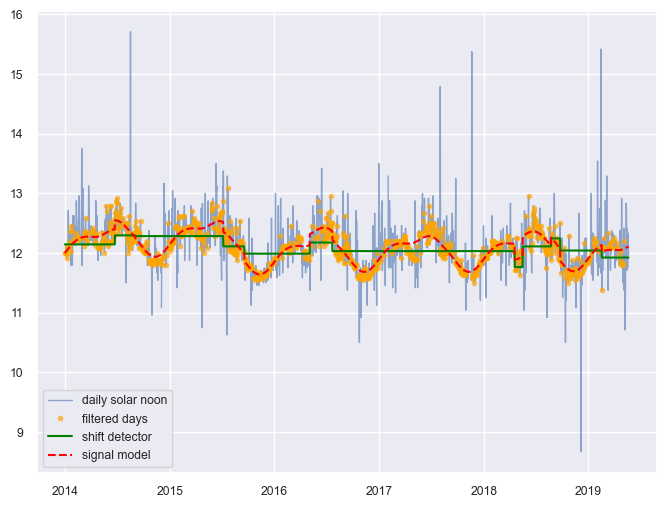

TABGC1044151
total time: 24.92 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              5.62s
Cleaning                   16.08s
Filtering/Summarizing      3.21s
    Data quality           0.44s
    Clear day detect       0.88s
    Clipping detect        0.22s
    Capacity change detect 1.67s

SS


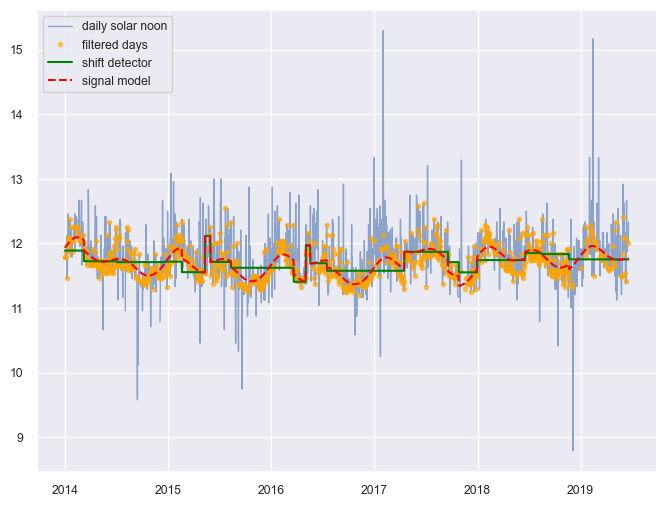

TABB01125140
total time: 7.92 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              2.37s
Cleaning                   4.43s
Filtering/Summarizing      1.11s
    Data quality           0.13s
    Clear day detect       0.21s
    Clipping detect        0.24s
    Capacity change detect 0.53s

SS


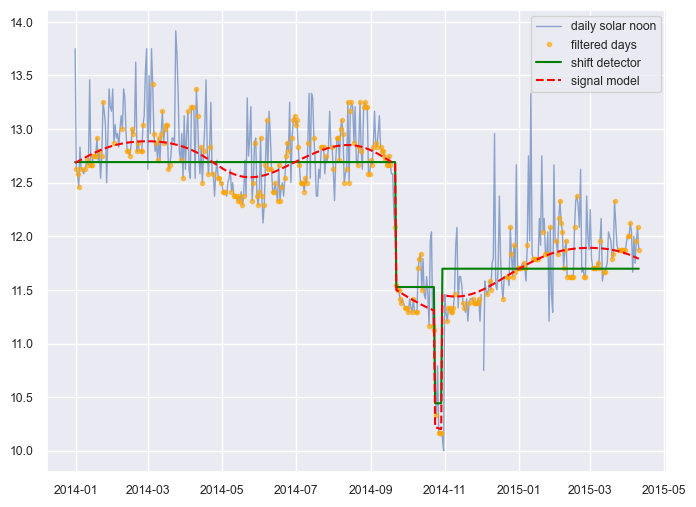

TABA01148025
total time: 17.36 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              5.61s
Cleaning                   8.20s
Filtering/Summarizing      3.54s
    Data quality           0.46s
    Clear day detect       1.04s
    Clipping detect        0.24s
    Capacity change detect 1.80s

SS


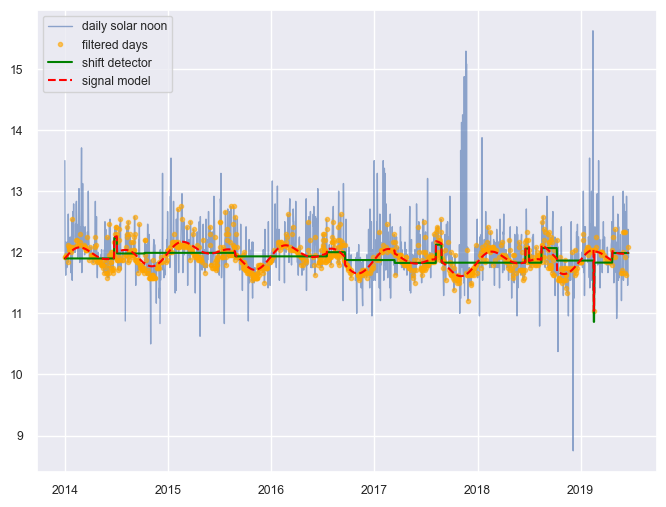

TACHC1020772
total time: 14.94 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              4.95s
Cleaning                   7.29s
Filtering/Summarizing      2.70s
    Data quality           0.37s
    Clear day detect       0.81s
    Clipping detect        0.21s
    Capacity change detect 1.32s

SS


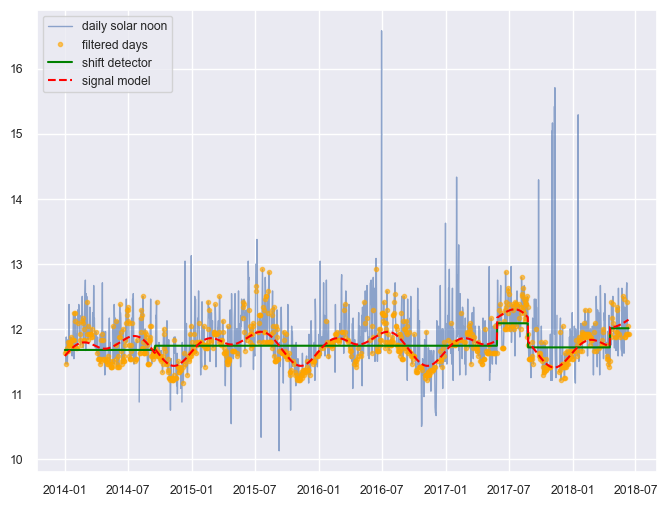

TACHC1022171
total time: 27.16 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              4.19s
Cleaning                   20.67s
Filtering/Summarizing      2.31s
    Data quality           0.29s
    Clear day detect       0.68s
    Clipping detect        0.22s
    Capacity change detect 1.11s

SS


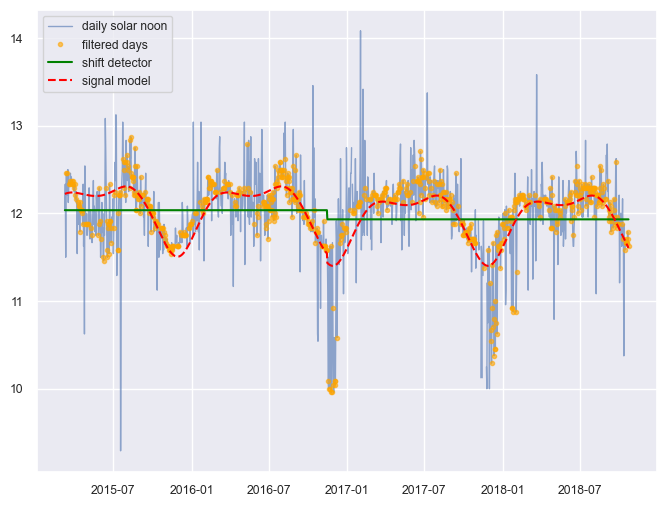

TACIC1066981
total time: 29.56 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              4.99s
Cleaning                   21.97s
Filtering/Summarizing      2.60s
    Data quality           0.37s
    Clear day detect       0.71s
    Clipping detect        0.23s
    Capacity change detect 1.29s

SS


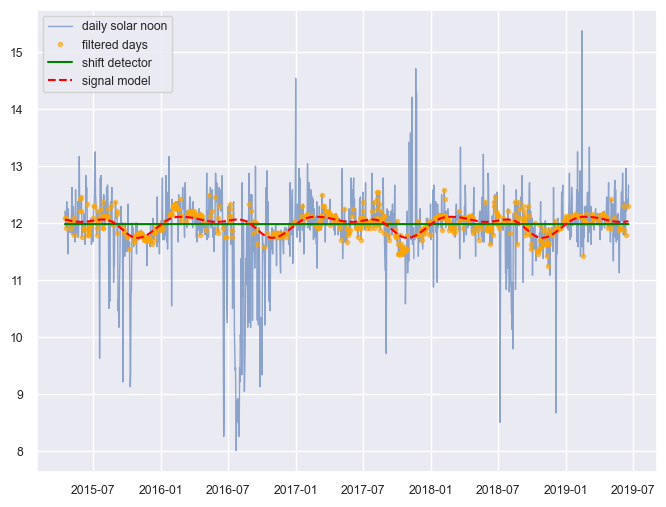

TAEAC1031314
total time: 21.08 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              4.52s
Cleaning                   13.82s
Filtering/Summarizing      2.73s
    Data quality           0.37s
    Clear day detect       0.83s
    Clipping detect        0.23s
    Capacity change detect 1.31s

SS


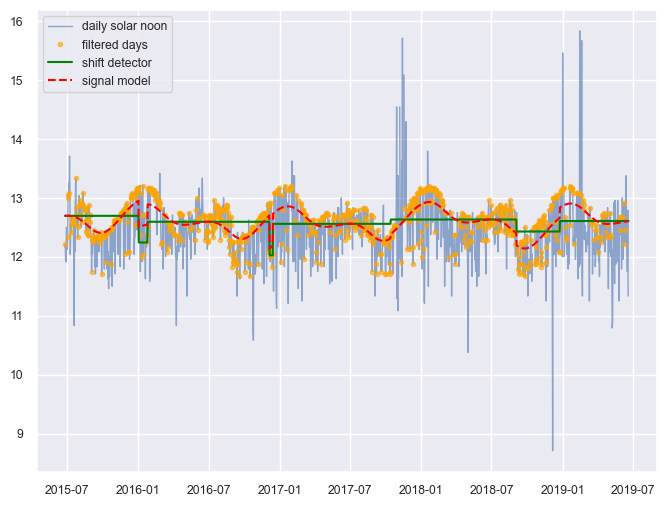

TADBC1077912
total time: 14.03 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              4.36s
Cleaning                   7.05s
Filtering/Summarizing      2.63s
    Data quality           0.33s
    Clear day detect       0.86s
    Clipping detect        0.21s
    Capacity change detect 1.22s

SS


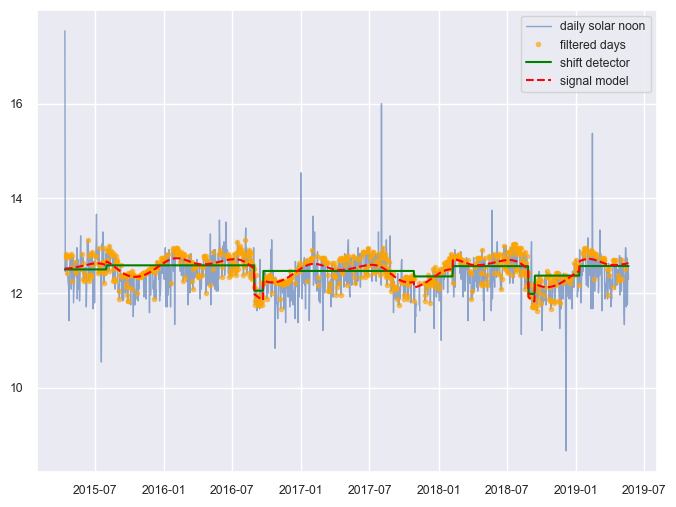

TAAJ01021775
total time: 14.57 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              4.41s
Cleaning                   7.16s
Filtering/Summarizing      3.00s
    Data quality           0.34s
    Clear day detect       1.11s
    Clipping detect        0.23s
    Capacity change detect 1.32s

SS


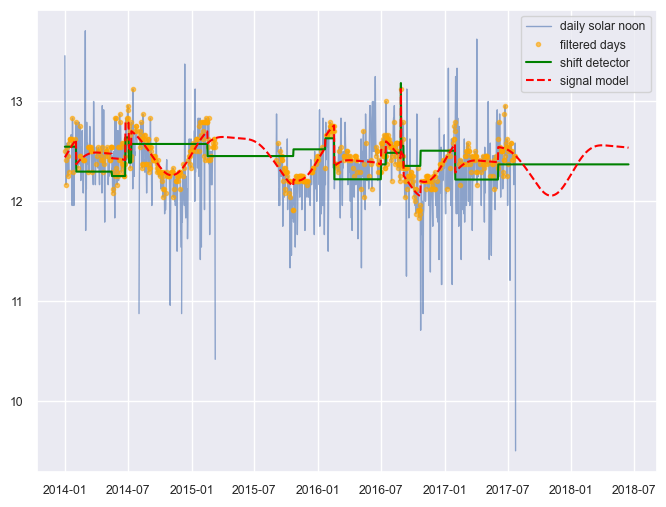

In [56]:
for path in true_list:
    print(path[23:-4])

    df = pd.read_csv(path)
    
    from solardatatools import DataHandler
    dh2 = DataHandler(df, convert_to_ts=True)
    dh2.l2norm = False 
    dh2.run_pipeline(power_col=dh2.keys[0][-1], fix_shifts=True, verbose=True, c2=163021.50491411684, solver="MOSEK")
    print("SS")
    dh2.plot_time_shift_analysis_results()
    plt.show()

TABF01017766
total time: 31.23 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              5.50s
Cleaning                   23.02s
Filtering/Summarizing      2.71s
    Data quality           0.43s
    Clear day detect       0.55s
    Clipping detect        0.22s
    Capacity change detect 1.50s

SS


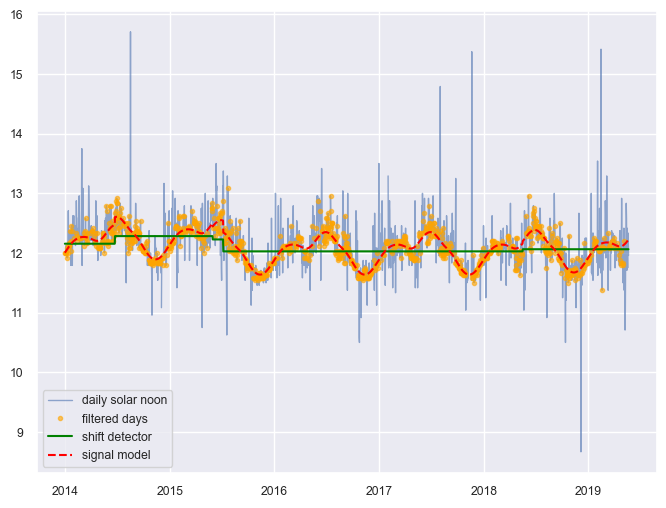

TABGC1044151
total time: 16.58 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              5.49s
Cleaning                   7.93s
Filtering/Summarizing      3.15s
    Data quality           0.44s
    Clear day detect       0.89s
    Clipping detect        0.21s
    Capacity change detect 1.62s

SS


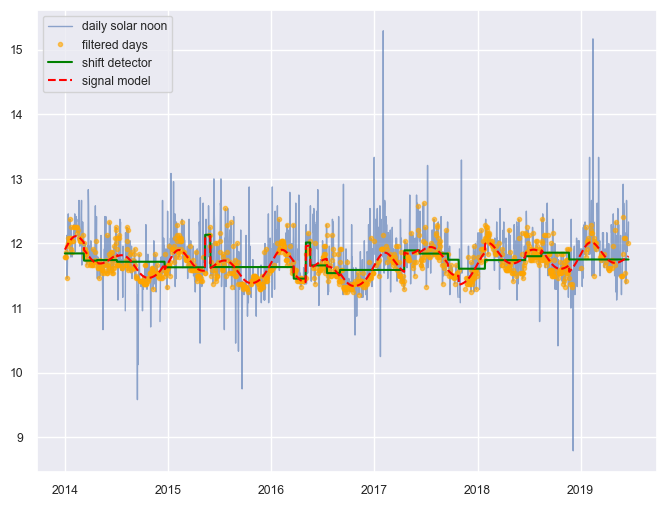

TABB01125140
total time: 7.29 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              2.24s
Cleaning                   3.99s
Filtering/Summarizing      1.06s
    Data quality           0.12s
    Clear day detect       0.21s
    Clipping detect        0.21s
    Capacity change detect 0.51s

SS


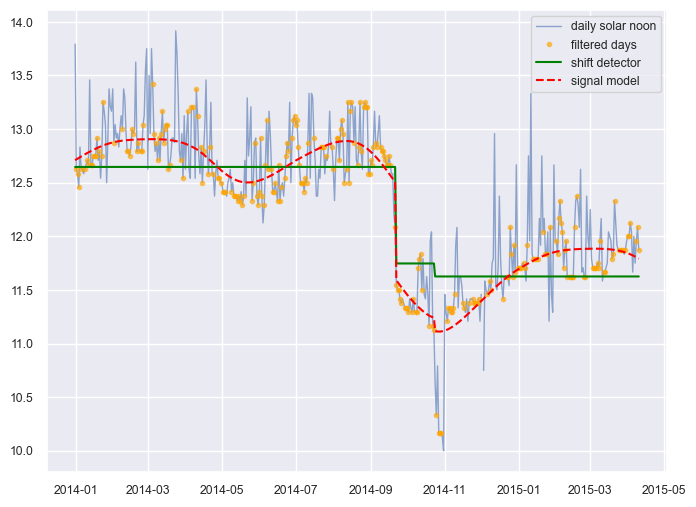

TABA01148025
total time: 24.07 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              5.45s
Cleaning                   15.42s
Filtering/Summarizing      3.20s
    Data quality           0.42s
    Clear day detect       0.99s
    Clipping detect        0.23s
    Capacity change detect 1.56s

SS


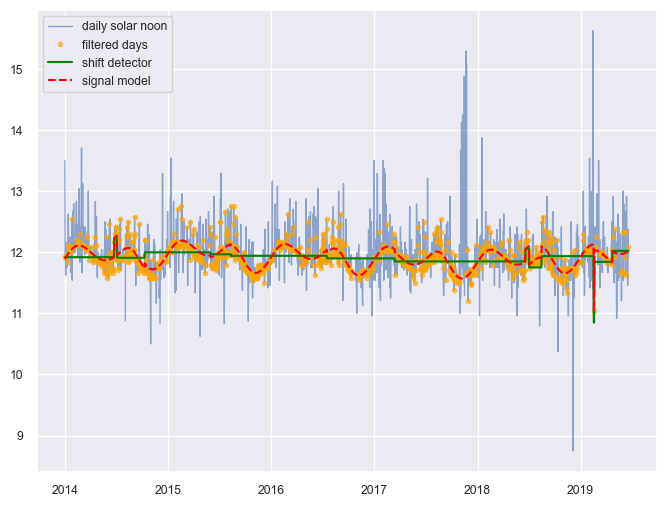

TACHC1020772
total time: 14.05 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              4.55s
Cleaning                   6.95s
Filtering/Summarizing      2.55s
    Data quality           0.35s
    Clear day detect       0.71s
    Clipping detect        0.21s
    Capacity change detect 1.28s

SS


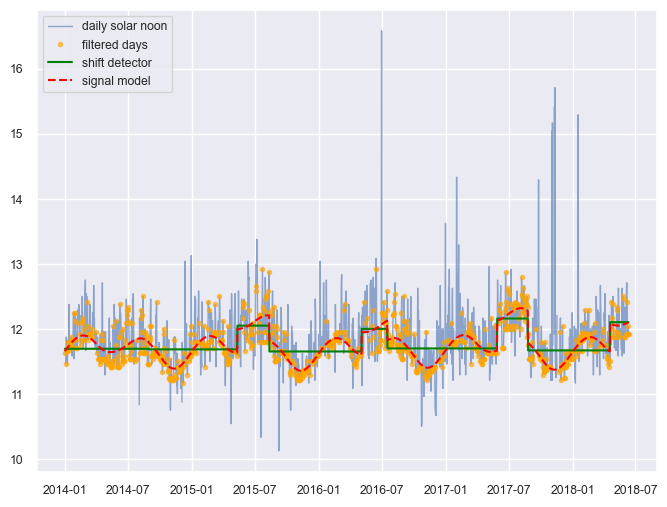

TACHC1022171
total time: 19.62 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              4.14s
Cleaning                   13.23s
Filtering/Summarizing      2.25s
    Data quality           0.29s
    Clear day detect       0.68s
    Clipping detect        0.22s
    Capacity change detect 1.05s

SS


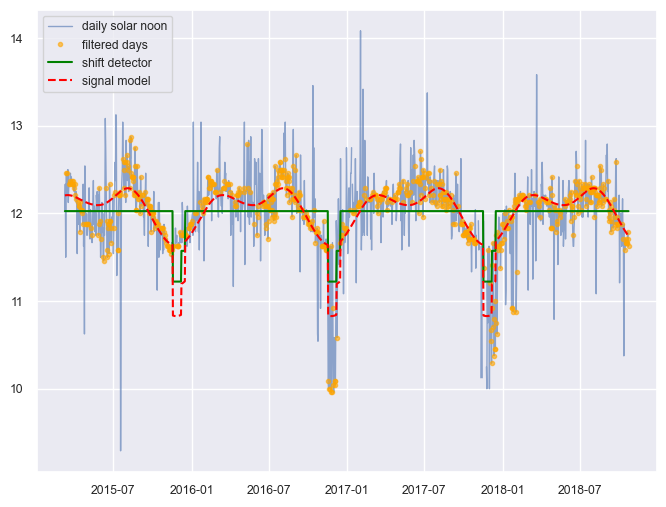

TACIC1066981
total time: 14.74 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              4.59s
Cleaning                   7.38s
Filtering/Summarizing      2.76s
    Data quality           0.34s
    Clear day detect       0.80s
    Clipping detect        0.23s
    Capacity change detect 1.40s

SS


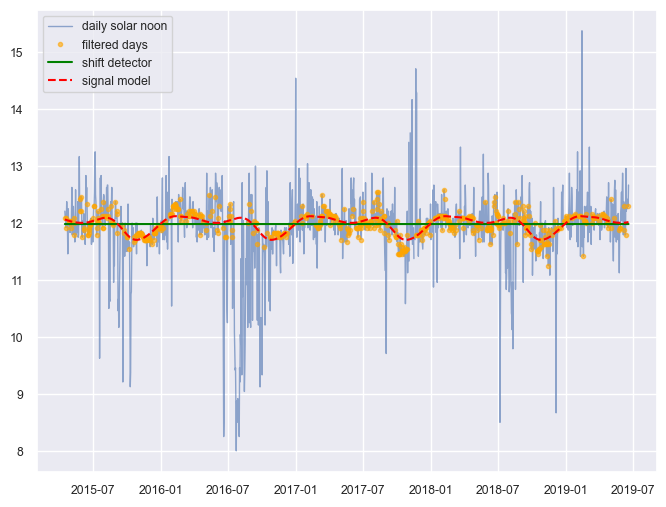

TAEAC1031314
total time: 14.13 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              4.65s
Cleaning                   7.05s
Filtering/Summarizing      2.43s
    Data quality           0.33s
    Clear day detect       0.68s
    Clipping detect        0.22s
    Capacity change detect 1.20s

SS


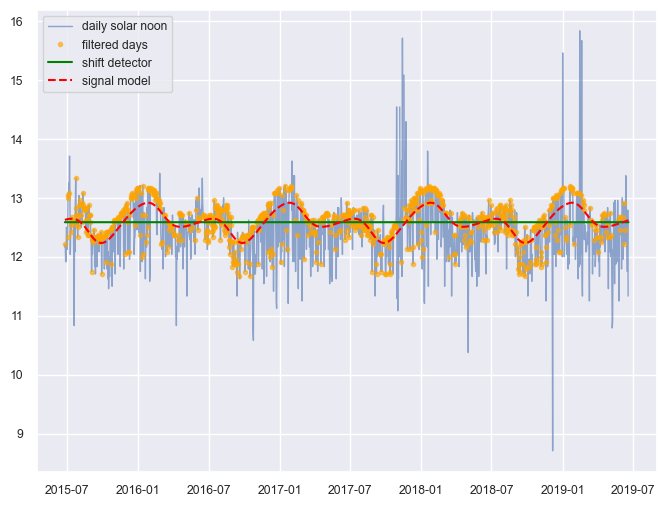

TADBC1077912
total time: 14.05 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              4.36s
Cleaning                   7.07s
Filtering/Summarizing      2.63s
    Data quality           0.35s
    Clear day detect       0.88s
    Clipping detect        0.21s
    Capacity change detect 1.18s

SS


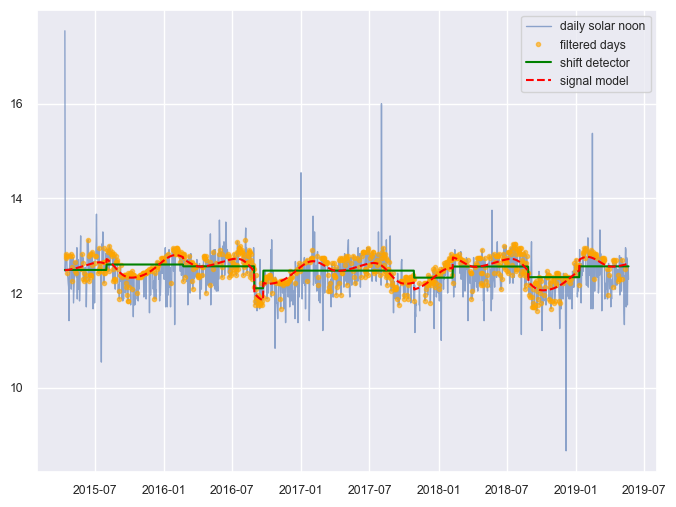

TAAJ01021775
total time: 20.85 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              4.41s
Cleaning                   13.74s
Filtering/Summarizing      2.71s
    Data quality           0.32s
    Clear day detect       1.04s
    Clipping detect        0.22s
    Capacity change detect 1.13s

SS


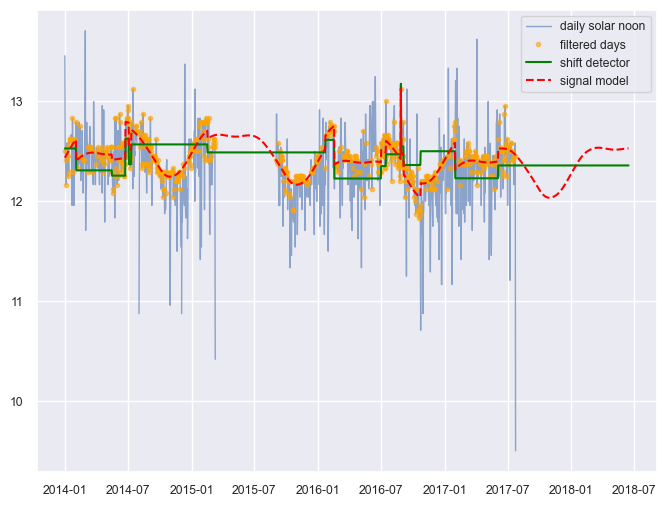

In [59]:
for path in true_list:
    print(path[23:-4])

    df = pd.read_csv(path)
    
    from solardatatools import DataHandler
    dh2 = DataHandler(df, convert_to_ts=True)
    dh2.l2norm = False 
    dh2.run_pipeline(power_col=dh2.keys[0][-1], fix_shifts=True, verbose=True, c2=60000, solver="MOSEK")
    print("SS")
    dh2.plot_time_shift_analysis_results()
    plt.show()